In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [4]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1000
Columns: 11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [7]:
df.select_dtypes('object').nunique()

Male               2
Timestamp        997
Clicked on Ad      2
city              30
province          16
category          10
dtype: int64

In [8]:
df.describe(percentiles=[.05, .25, .5, .75, .90, .95]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,4.995000e+01,2.497500e+02,4.995000e+02,7.492500e+02,8.991000e+02,9.490500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,3.753100e+01,5.127000e+01,6.811000e+01,7.846000e+01,8.377000e+01,8.600000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.395000e+01,2.900000e+01,3.500000e+01,4.200000e+01,4.900000e+01,5.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,1.981001e+08,3.286330e+08,3.990683e+08,4.583554e+08,4.935509e+08,5.152446e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.132840e+02,1.387100e+02,1.826500e+02,2.187900e+02,2.361580e+02,2.466080e+02,2.670100e+02


In [9]:
print("Data Duplicat:", df.duplicated().sum())

Data Duplicat: 0


In [10]:
def initial_cleaning(df):
    """Do the initial changes describe it above"""
    # Drop columns 
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    # Transform the format of dt_customer
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format=('%Y-%m-%d %H:%M'))
    # Rename columns for more practicity
    df.columns = df.columns.str.lower()
    return df

In [ ]:
feature = ["Age", 'Daily Internet Usage', 'Daily Time Spent on Site']
plt.figure(figsize=(15, 15))

for i, column in enumerate(feature, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
     

In [90]:
def num_plot(df, col, hue=None):
    """Graph a histogram with a boxplot above for one numerical column"""
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8), gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=col, y=hue, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
    ax[0].set_xlabel(col.replace('_', ' ').title())
    ax[0].set(yticks=[])
    
    sns.histplot(x=col, hue=hue, data=df, ax=ax[1], alpha=.6, legend=True, palette='husl')
    ax[1].set_xlabel(col.replace('_', ' ').title(), fontsize=22, loc='left')
       
    ax[1].axvline(df[col].mean(), color='#f4cccc', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(), 1)))
    ax[1].axvline(df[col].median(), color='#fff2cc', linewidth=2.2, label='median=' + str(np.round(df[col].median(), 1)))
    ax[1].axvline(df[col].mode()[0], color='#c27ba0', linewidth=2.2, label='mode=' + str(df[col].mode()[0]))
    
    plt.tight_layout()
    return ax


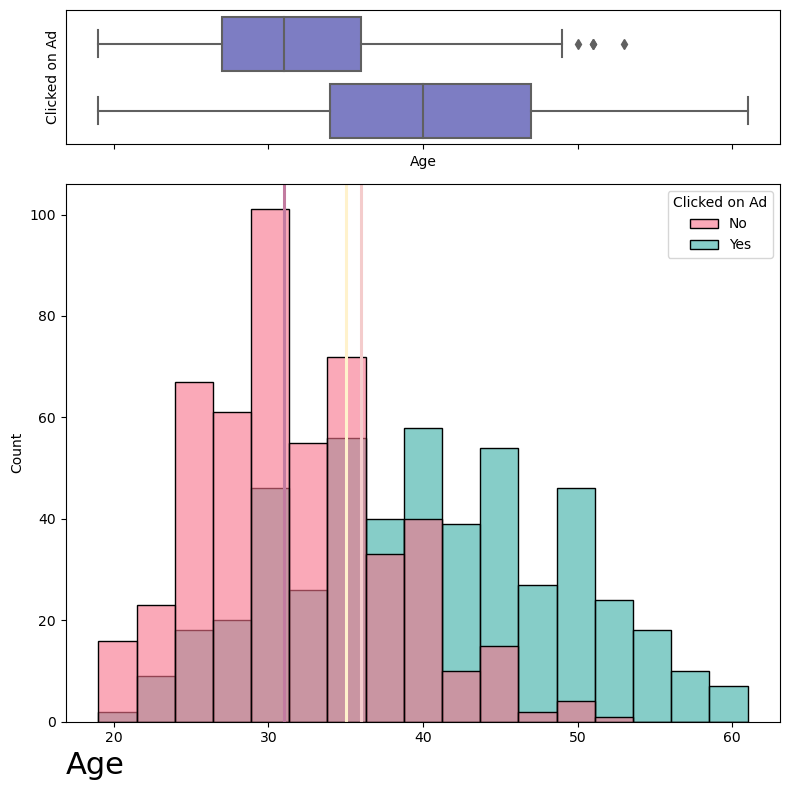

In [91]:
num_plot(df, 'Age', hue='Clicked on Ad')
plt.show()

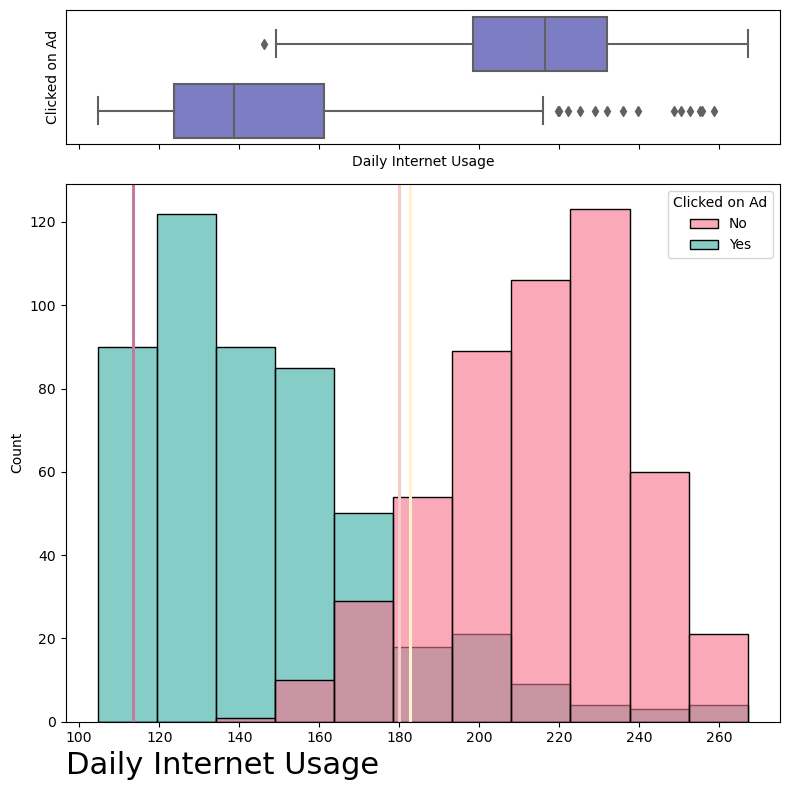

In [92]:
num_plot(df, "Daily Internet Usage", hue='Clicked on Ad')
plt.show()

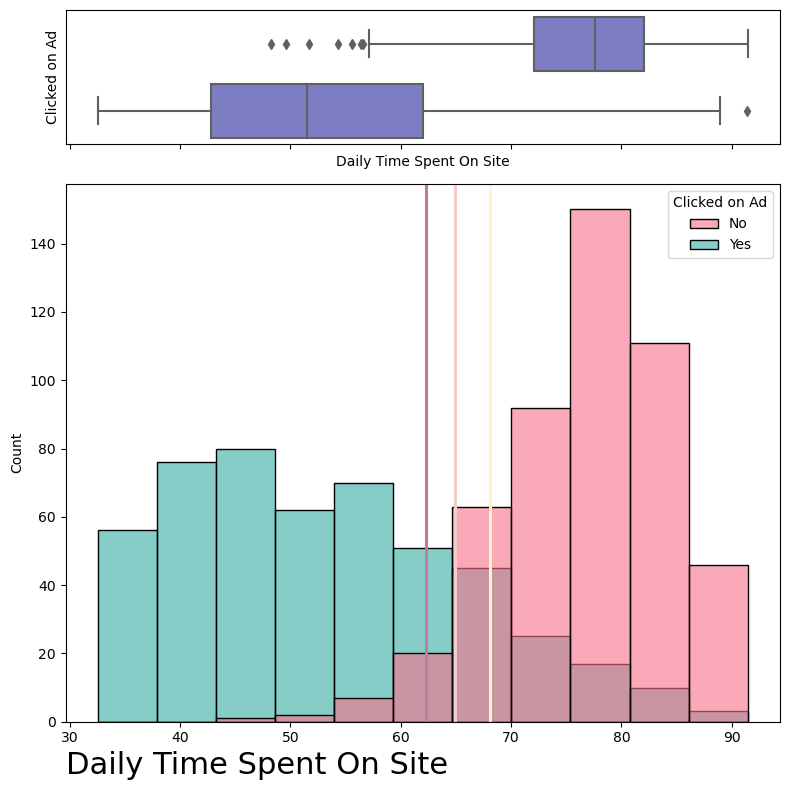

In [93]:
num_plot(df, 'Daily Time Spent on Site', hue='Clicked on Ad')
plt.show()

In [64]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes(exclude='object')
cats = categorical.columns
nums = numerical.columns

<Figure size 1000x1000 with 0 Axes>

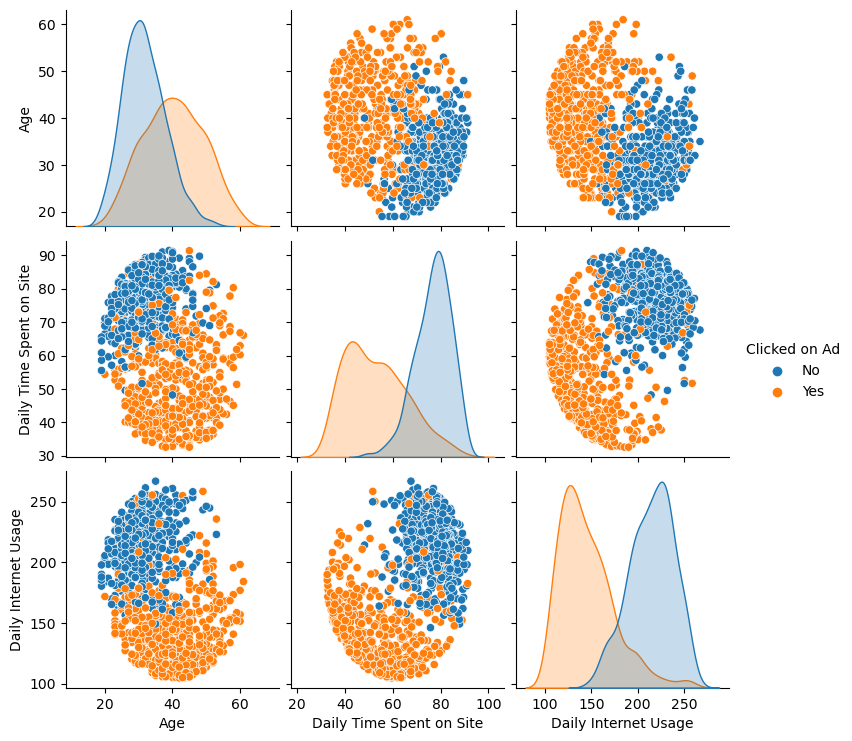

In [94]:
plt.figure(figsize = (10,10))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

In [71]:
cats

Index(['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')

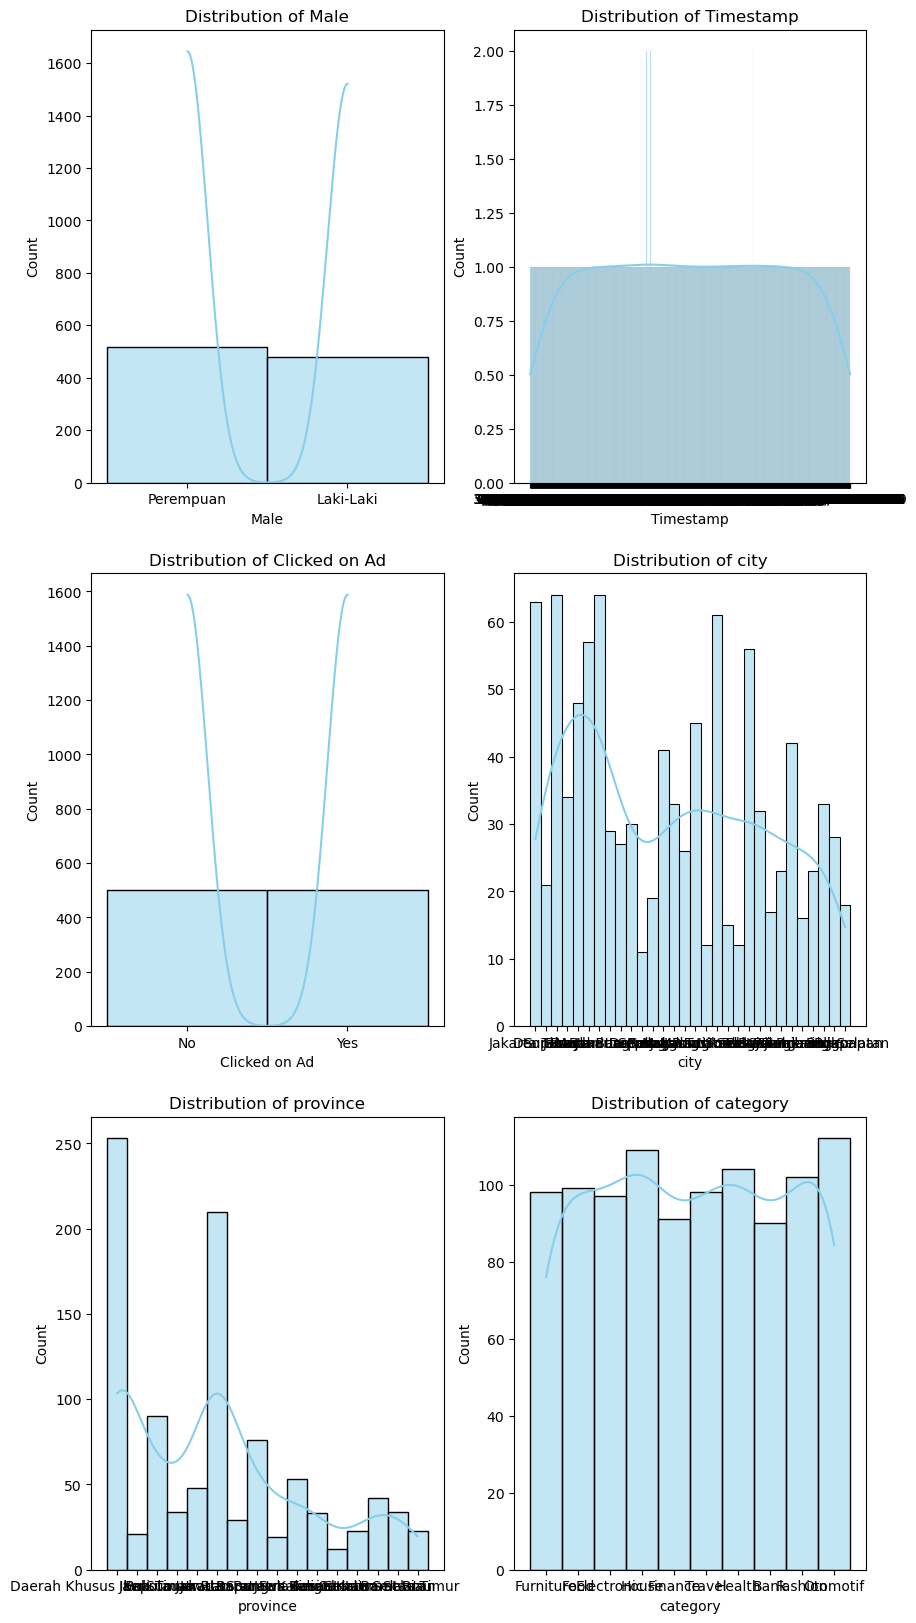

In [75]:
plt.figure(figsize=(10, 20))
for i, column in enumerate(cats, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')